###Importing the different libaries

In [18]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning / preprocessing (if needed)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Drop the "EmployeeCount', 'Over18', 'StandardHours" cols as they dont add to the overall data

In [19]:
# Load your CSV
file_path = "../data/raw_data/HR-Employee-Attrition.csv"
df = pd.read_csv(file_path)

# Drop unnecessary constant columns
df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])

# Check the new shape
print(df.shape)
df.head()

(1470, 32)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [20]:
output_path = "../Data_cleaning/HR-Employee-Attrition_cleaned.csv"
df.to_csv(output_path, index=False)

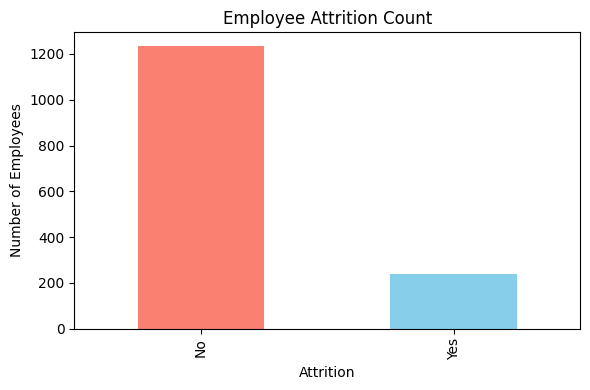

**Analysis:** This plot shows the number of employees who left (Attrition=Yes) versus those who stayed. High attrition may indicate retention issues.

<Figure size 800x500 with 0 Axes>

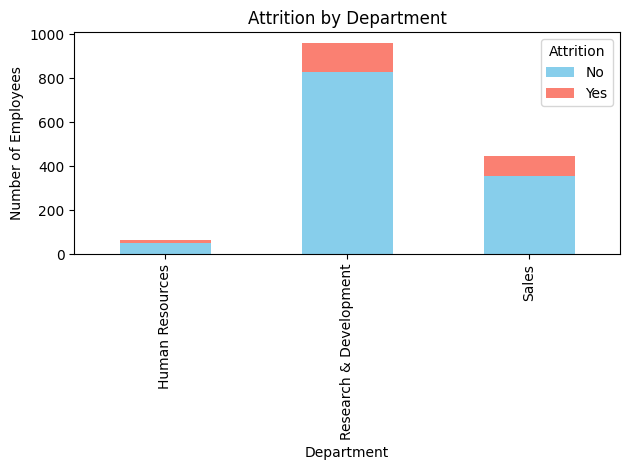

**Analysis:** This plot shows which departments have the highest attrition. Focus retention efforts on departments with more leavers.

<Figure size 600x400 with 0 Axes>

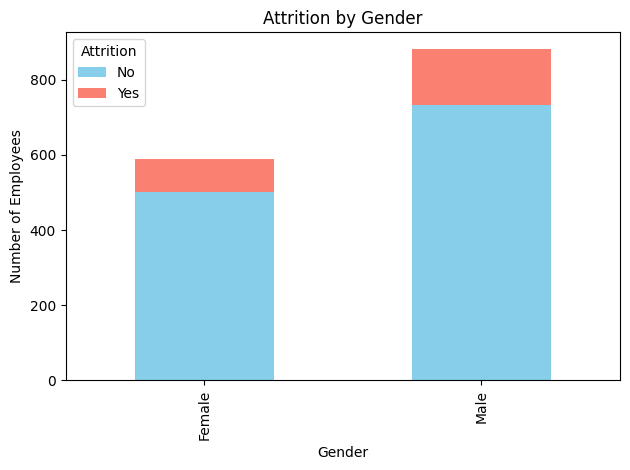

**Analysis:** This plot shows if attrition is higher for a particular gender. Address any gender-specific retention issues.

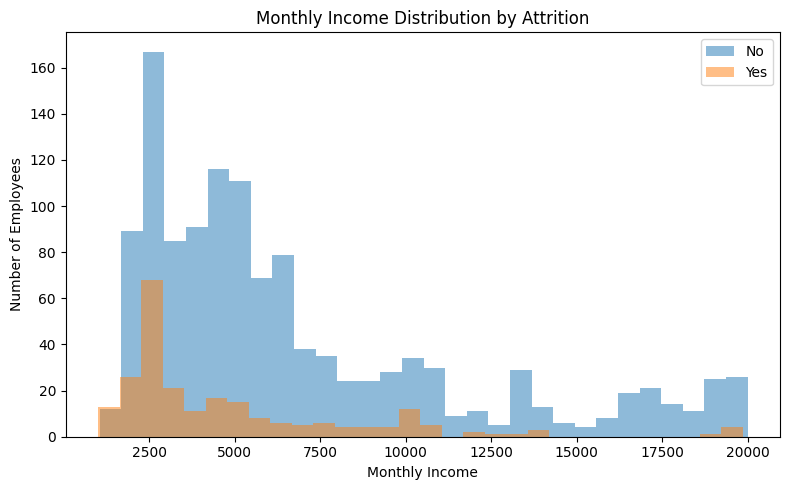

**Analysis:** This plot compares the income distribution of employees who left versus those who stayed. Lower income may correlate with higher attrition.

<Figure size 800x500 with 0 Axes>

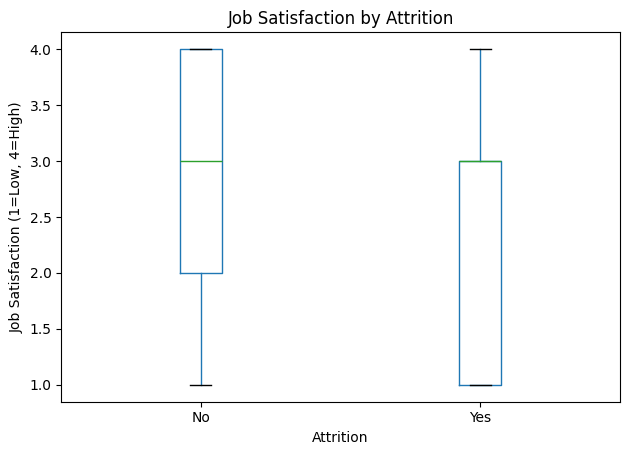

**Analysis:** This boxplot shows if employees who left had lower job satisfaction. Improving satisfaction may reduce attrition.

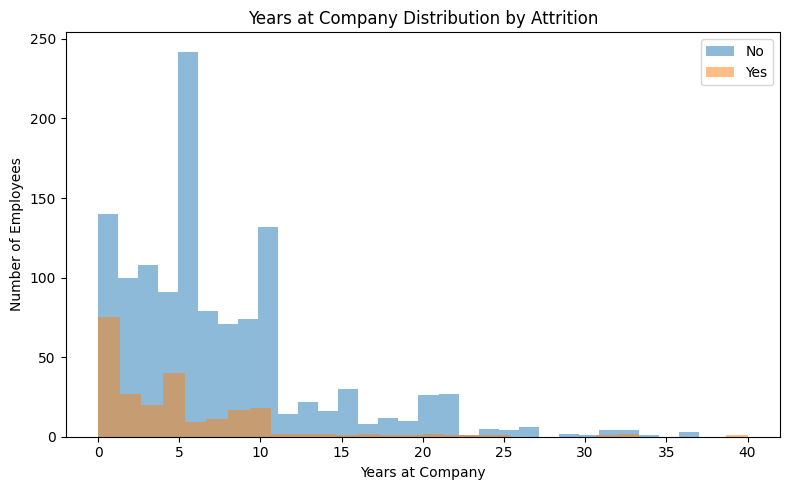

**Analysis:** This plot shows how long employees who left versus stayed had been at the company. High early attrition may indicate onboarding or engagement issues.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from IPython.display import display, Markdown

# Load the cleaned HR dataset
df = pd.read_csv(r'C:/Users/midas/Documents/2505-WMCA-Data-Git101/Human-Resources/Data_cleaning/HR-Employee-Attrition_cleaned.csv')

plot_dir = r'C:/Users/midas/Documents/2505-WMCA-Data-Git101/Human-Resources/Business_case/plots'
os.makedirs(plot_dir, exist_ok=True)

# 1. Attrition Count Plot
plt.figure(figsize=(6,4))
df['Attrition'].value_counts().plot(kind='bar', color=['salmon','skyblue'])
plt.title('Employee Attrition Count')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'attrition_count.png'))
plt.show()
display(Markdown('**Employee Attrition Count:** This plot shows the number of employees who left (Attrition=Yes) versus those who stayed. High attrition may indicate retention issues.'))

# 2. Attrition by Department
plt.figure(figsize=(8,5))
pd.crosstab(df['Department'], df['Attrition']).plot(kind='bar', stacked=True, color=['skyblue','salmon'])
plt.title('Attrition by Department')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'attrition_by_department.png'))
plt.show()
display(Markdown('**Attrition by Department:** This plot shows which departments have the highest attrition. Focus retention efforts on departments with more leavers.'))

# 3. Attrition by Gender
plt.figure(figsize=(6,4))
pd.crosstab(df['Gender'], df['Attrition']).plot(kind='bar', stacked=True, color=['skyblue','salmon'])
plt.title('Attrition by Gender')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'attrition_by_gender.png'))
plt.show()
display(Markdown('**Attrition by Gender:** This plot shows if attrition is higher for a particular gender. Address any gender-specific retention issues.'))

# 4. Monthly Income Distribution by Attrition
plt.figure(figsize=(8,5))
for label, group in df.groupby('Attrition'):
    plt.hist(group['MonthlyIncome'], bins=30, alpha=0.5, label=label)
plt.title('Monthly Income Distribution by Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Number of Employees')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'income_by_attrition.png'))
plt.show()
display(Markdown('**Monthly Income Distribution by Attrition:** This plot compares the income distribution of employees who left versus those who stayed. Lower income may correlate with higher attrition.'))

# 5. Job Satisfaction by Attrition
plt.figure(figsize=(8,5))
df.boxplot(column='JobSatisfaction', by='Attrition', grid=False)
plt.title('Job Satisfaction by Attrition')
plt.suptitle('')
plt.ylabel('Job Satisfaction (1=Low, 4=High)')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'jobsatisfaction_by_attrition.png'))
plt.show()
display(Markdown('**Job Satisfaction by Attrition:** This boxplot shows if employees who left had lower job satisfaction. Improving satisfaction may reduce attrition.'))

# 6. Years at Company Distribution by Attrition
plt.figure(figsize=(8,5))
for label, group in df.groupby('Attrition'):
    plt.hist(group['YearsAtCompany'], bins=30, alpha=0.5, label=label)
plt.title('Years at Company Distribution by Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'years_at_company_by_attrition.png'))
plt.show()
display(Markdown('**Years at Company Distribution by Attrition:** This plot shows how long employees who left versus stayed had been at the company. High early attrition may indicate onboarding or engagement issues.'))